In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Pacakges
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter

import warnings
warnings.filterwarnings(action='ignore')

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Data
sonocam = pd.read_csv("/content/drive/MyDrive/소노캄/Rawdata.csv")
sonocam = sonocam.rename(columns = {'Review' : 'review' , 'Hotel name' : 'hotel_name', 'Current score' : 'current_score'})

In [12]:
sonocam.head()

,hotel_name,current_score,review
0,소노캄 거제,"""4""","""Great hotel with a great view. The room were..."
1,소노캄 거제,"""4""","""Beautiful quiet hotel the AC in our room did..."
2,소노캄 거제,"""5""","""This place has good view and give excellent..."
3,소노캄 거제,"""4""","""The view is 100% but bedding was horrible an..."
4,소노캄 거제,"""4""","""Good Aqua Park"""


In [13]:
# 점수 문자열 제거
sonocam['current_score'] = sonocam['current_score'].str.strip().str.strip('"').apply(lambda x: int(x))

In [14]:
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()

    # 특수문자 제거
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)

    # 토큰화
    tokens = word_tokenize(text)

    # 불용어 제거
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # 어간 추출 또는 표제어 추출
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # 최종 전처리된 텍스트 반환
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

In [15]:
# 리뷰 텍스트 전처리
sonocam['text'] = sonocam['review'].apply(lambda x : preprocess_text(x))

In [16]:
sonocam

,hotel_name,current_score,review,text
0,소노캄 거제,4,"""Great hotel with a great view. The room were...",great hotel great view room clean food amazing...
1,소노캄 거제,4,"""Beautiful quiet hotel the AC in our room did...",beautiful quiet hotel ac room get cool tv work...
2,소노캄 거제,5,"""This place has good view and give excellent...",place good view give excellent service
3,소노캄 거제,4,"""The view is 100% but bedding was horrible an...",view 100 bedding horrible recommendable
4,소노캄 거제,4,"""Good Aqua Park""",good aqua park
...,...,...,...,...
2559,소노캄 거제,5,"""(Translated by Google) Geoje Marina ~(Origin...",translated google geoje marina original
2560,소노캄 거제,5,"""(Translated by Google) Geoje Marina(Original...",translated google geoje marina original
2561,소노캄 거제,4,"""(Translated by Google) Geoje Daemyung Resort...",translated google geoje daemyung resort original
2562,소노캄 거제,4,"""(Translated by Google) Geoje Daemyung Resort...",translated google geoje daemyung resort geoje ...


In [17]:
# 필요한 열만 가져오기
df = sonocam[['current_score','text']]
df.head(3)

,current_score,text
0,4,great hotel great view room clean food amazing...
1,4,beautiful quiet hotel ac room get cool tv work...
2,5,place good view give excellent service


In [18]:
# 특정 문자열 제거
def remove_text(text):
    if 'translated' in text:
      text = text.replace('translated google', '')
      text = text.replace('original', '')
    else:
      pass
    return text

In [19]:
df['text'] = df['text'].apply(lambda x : remove_text(x))

In [20]:
df

,current_score,text
0,4,great hotel great view room clean food amazing...
1,4,beautiful quiet hotel ac room get cool tv work...
2,5,place good view give excellent service
3,4,view 100 bedding horrible recommendable
4,4,good aqua park
...,...,...
2559,5,geoje marina
2560,5,geoje marina
2561,4,geoje daemyung resort
2562,4,geoje daemyung resort geoje marina


In [21]:
# 문장 토큰화 및 단어 빈도 계산
tokenized_words = [word_tokenize(sentence) for sentence in df['text']]
word_freq = [Counter(tokens) for tokens in tokenized_words]

In [22]:
# 단어 빈도 총 합
total_counter = Counter()

for counter in word_freq:
    total_counter.update(counter)

In [27]:
# 상위 5개만 보기
n = 5
top_n_items = total_counter.most_common(n)

for item, count in top_n_items:
    print(f'{item}: {count}')

good: 1668
read: 1032
view: 898
room: 719
facility: 676


In [28]:
# 빈도수 내림차순 정렬하여 상위 50개 선택
top_50 = dict(total_counter.most_common(50))

In [29]:
word_df = pd.DataFrame.from_dict(top_50, orient='index', columns=['Count'])

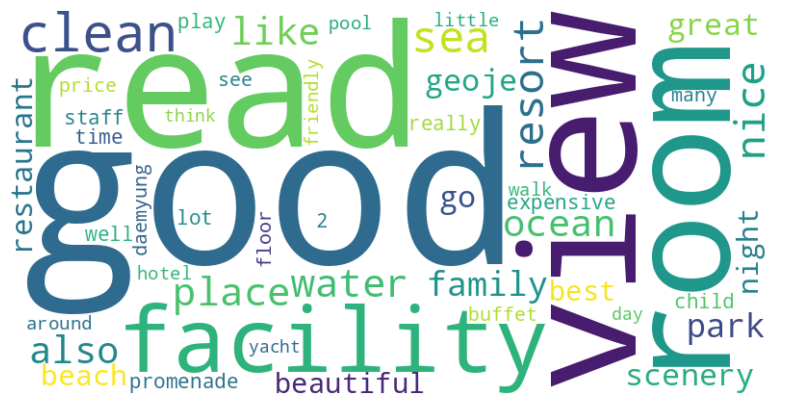

In [30]:
# 워드 클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_50)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
# 평점 평균
df['current_score'].mean()

4.366224648985959

<Axes: >

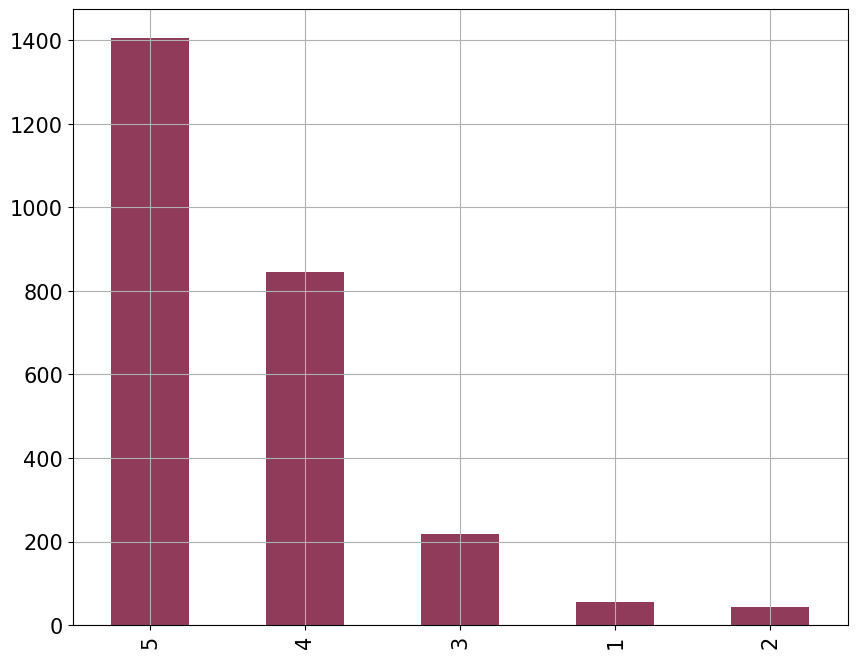

In [32]:
# 평점 시각화
CountStatus = pd.value_counts(df['current_score'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15, color = 'r', alpha = 0.5)

In [35]:
# 부정적인 리뷰 확인
df[((df['current_score'] == 1) | (df['current_score'] == 2)) & (df['text'].str.len() >= 30)]

,current_score,text
7,1,thing suite going view got 2 bedroom suite one...
12,2,experience never stay kind hotel feel like not...
14,1,really dont wan na visit disappointing houseke...
24,2,poor implement particularly kitchen bathroom
91,1,went swim indoor swimming pool closed amenity...
...,...,...
1995,1,buffet expensive pool small read buffet expe...
1998,2,staff friendly additional cost added towel lo...
2002,2,mean like air conditioner room
2042,1,restaurant neighborhood resort price really d...


In [34]:
# 부정적인 리뷰 데이터
df_neg = df[((df['current_score'] == 1) | (df['current_score'] == 2))]

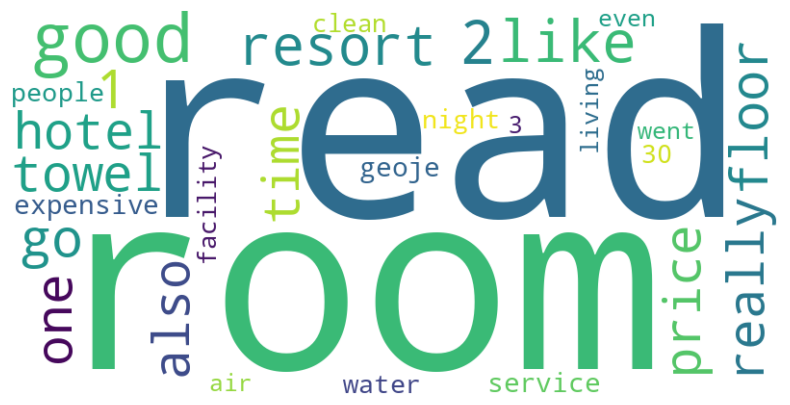

In [36]:
# 부정적인 리뷰 워드클라우드
tokenized_words = [word_tokenize(sentence) for sentence in df_neg['text']]
word_freq = [Counter(tokens) for tokens in tokenized_words]
total_counter = Counter()

for counter in word_freq:
    total_counter.update(counter)
top_50 = dict(total_counter.most_common(30))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_50)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# 하나 보기
df['text'][0]

'great hotel great view room clean food amazing several choice food many thing near area definitely relaxing read moregreat hotel great view room clean food amazing several choice food many thing near area definitely relaxing hotel room large 2 room great water view several thing inside would change bathroom shower head see picture shower head wish normal shower also master bathroom curtain'

In [58]:
import nltk
nltk.download('sentiwordnet')
nltk.download('word_tokenize')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


False

In [59]:
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize

def sentiment_analysis(sentence):
    # 텍스트 전처리 및 토큰화
    tokens = word_tokenize(sentence)

    positive_score = 0
    negative_score = 0

    # 감성 점수 계산
    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        if synsets:
            pos_score = synsets[0].pos_score()
            neg_score = synsets[0].neg_score()
            positive_score += pos_score
            negative_score += neg_score

    # 감성 분석 결과 반환
    if positive_score > negative_score:
        return 1
    elif positive_score < negative_score:
        return -1
    else:
        return 0

In [60]:
df['sentiment_word'] = df['text'].apply(lambda x: sentiment_analysis(x))

<Axes: >

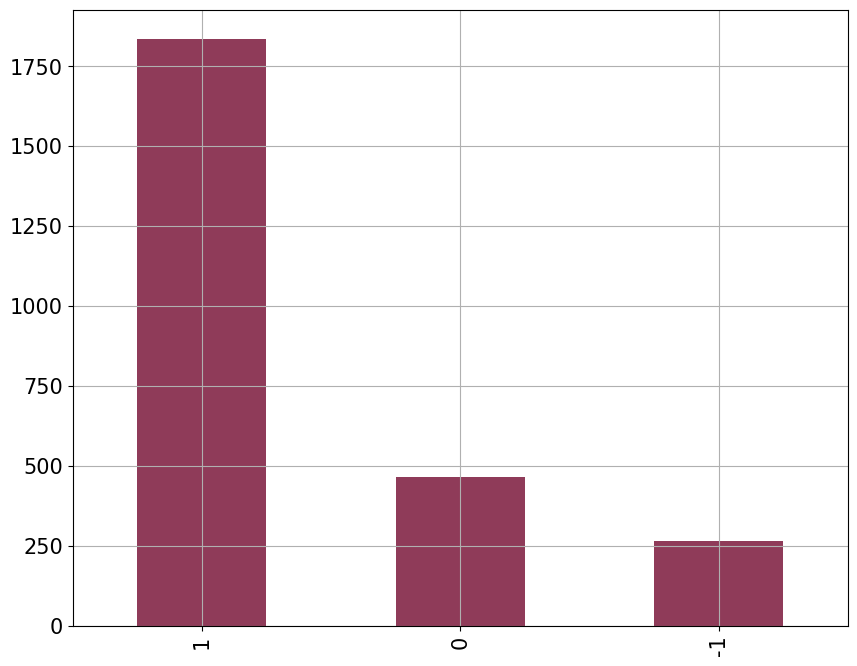

In [61]:
# 감성 분석 결과
CountStatus = pd.value_counts(df['sentiment_word'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15, color = 'r', alpha = 0.5)

In [62]:
df

,current_score,text,sentiment_word
0,4,great hotel great view room clean food amazing...,-1
1,4,beautiful quiet hotel ac room get cool tv work...,1
2,5,place good view give excellent service,1
3,4,view 100 bedding horrible recommendable,-1
4,4,good aqua park,1
...,...,...,...
2559,5,geoje marina,-1
2560,5,geoje marina,-1
2561,4,geoje daemyung resort,0
2562,4,geoje daemyung resort geoje marina,-1


In [64]:
# 부정적인 감성 인덱스 추출
indices = list(df[df['sentiment_word'] == -1].index)
subset_df = df.iloc[indices]
subset_df

,current_score,text,sentiment_word
0,4,great hotel great view room clean food amazing...,-1
3,4,view 100 bedding horrible recommendable,-1
10,4,little bit old many service coronavirus kid be...,-1
22,3,could nice resort say failed keep service qual...,-1
40,4,stay rainy day get experience pool water part ...,-1
...,...,...,...
2556,5,daemyung resort geoje marina,-1
2558,5,daemyung resort observatory geoje marina,-1
2559,5,geoje marina,-1
2560,5,geoje marina,-1


In [65]:
# 감정 점수 각각 계산
def neg_analysis(sentence):
    tokens = word_tokenize(sentence)

    positive_score = 0
    negative_score = 0

    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        if synsets:
            pos_score = synsets[0].pos_score()
            neg_score = synsets[0].neg_score()
            positive_score += pos_score
            negative_score += neg_score
    return positive_score ,negative_score

In [66]:
subset_df['positive_score'], subset_df['negative_score'] = zip(*subset_df['text'].apply(neg_analysis))

In [68]:
subset_df

,current_score,text,sentiment_word,positive_score,negative_score
0,4,great hotel great view room clean food amazing...,-1,1.875,2.250
3,4,view 100 bedding horrible recommendable,-1,0.000,0.625
10,4,little bit old many service coronavirus kid be...,-1,0.250,0.375
22,3,could nice resort say failed keep service qual...,-1,0.500,1.375
40,4,stay rainy day get experience pool water part ...,-1,0.000,0.250
...,...,...,...,...,...
2556,5,daemyung resort geoje marina,-1,0.000,0.125
2558,5,daemyung resort observatory geoje marina,-1,0.000,0.125
2559,5,geoje marina,-1,0.000,0.125
2560,5,geoje marina,-1,0.000,0.125


In [70]:
# 부정적인 점수 1이상, 평점 2이하 추출
a = list(subset_df[(subset_df['negative_score'] >= 1) & (subset_df['current_score'] <= 2)].index)
a

[194,
 212,
 262,
 398,
 484,
 577,
 646,
 843,
 929,
 1324,
 1356,
 1409,
 1809,
 1871,
 2354]

In [71]:
sonocam['review'][2354]

' "(Translated by Google) Worst of bed(Original)침대최악"'

In [72]:
# 긍정적인 점수 2이상, 평점 4이상 추출
list(subset_df[(subset_df['positive_score'] >= 2) & (subset_df['current_score'] >= 4)].index)

[171, 379, 412, 429, 540, 735, 861, 1892]

In [73]:
sonocam['review'][1892]

' "(Translated by Google) Accessibility is not bad either but just a little expensive \xa0…Read more(Translated by Google) Accessibility is not bad either but just a little expensive(Original)접근성도 그렇고 나쁘진 않아요 다만 좀 비싼듯"'